# DNN Regression

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [16]:
df = pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [17]:
df.drop(['Serial No.'], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


### Show dataset

In [19]:
corr = df.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


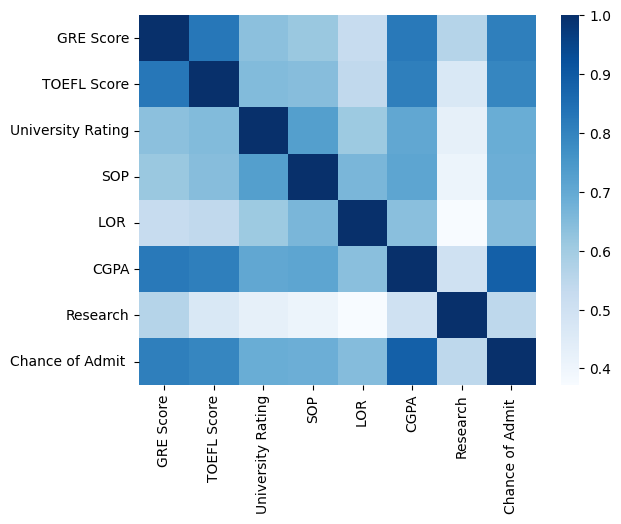

In [20]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Blues');

### Create model

In [23]:
model = Sequential(name='Regression')
model.add(Dense(8,input_shape = (7,), activation='relu'))
# Nếu input chỉ có 1 chiều thì bắt buộc phải để trống giá trị thứ 2 của tuple(dimenson,)
# activation: 'relu', 'sigmoid', 'tanh', 'linear'
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))
# Thiết lập thông số
model.compile(loss='mean_squared_error', optimizer='adam')
# compile : Dùng để thiết lập hàm loss, optimizer
# loss: 'means_squared_error', 'binary_crossentropy',...
# optimizer: 'adam', 'sgd', ' rmsprop', adagrad'
model.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 64        
                                                                 
 dense_19 (Dense)            (None, 3)                 27        
                                                                 
 dense_20 (Dense)            (None, 1)                 4         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


### split X and y

In [26]:
X = np.asanyarray(df.drop("Chance of Admit ", axis=1))
y = np.asanyarray(df['Chance of Admit '])

### Train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [29]:
X_train

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

### Train

In [30]:
history = model.fit(X_train, y_train, epochs=40, batch_size=3)
# Một Epoch được tính là khi đưa tất cả dữ liệu vào mạng neural network 1 lần.
# Batch - chia toàn bộ data thành nhiều gói dữ liệu nhỏ hơn để đưa vào mạng neuron
# Để hoàn thành một epoch sẽ cần nhiều lần chạy (iteration) hơn

Epoch 1/40
134/134 [==============================] - 1s 2ms/step - loss: 0.2498
Epoch 2/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 3/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 4/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 5/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 6/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 7/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 8/40
134/134 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 9/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 10/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 11/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 12/40
134/134 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 13/40
134/134 [====

### Plot history

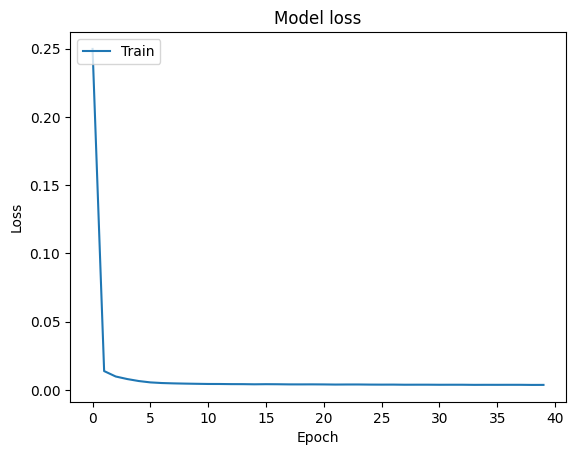

In [36]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left');


### Evaluate

In [38]:
prediction = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


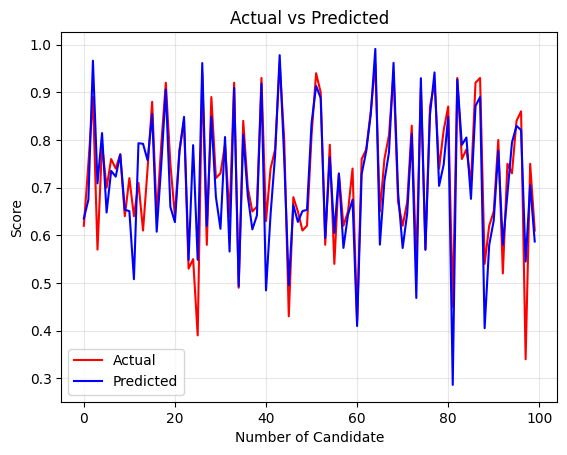

In [41]:
plt.plot(y_test, color = 'red', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()

In [44]:
print('r_square score: ', r2_score(y_test, prediction))
train_prediction = model.predict(X_train);
print('r_square score (train dataset): ', r2_score(y_train, train_prediction))

r_square score:  0.7857340826326547
13/13 [==============================] - 0s 1ms/step
r_square score (train dataset):  0.8249497440602426


In [45]:
# Tinh loss
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0041


0.004137689247727394